Interacting with Web APIs
Problem Statement: Analyzing Weather Data from OpenWeatherMap API
Dataset: Weather data retrieved from OpenWeatherMap API
Description: The goal is to interact with the OpenWeatherMap API to retrieve weather data 
for a specific location and perform data modeling and visualization to analyze weather 
patterns over time.
Tasks to Perform:
1. Register and obtain API key from OpenWeatherMap.
2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for 
a specific location.
3. Extract relevant weather attributes such as temperature, humidity, wind speed, and 
precipitation from the API response.
4. Clean and preprocess the retrieved data, handling missing values or inconsistent 
formats.
5. Perform data modeling to analyze weather patterns, such as calculating average 
temperature, maximum/minimum values, or trends over time.
6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or 
scatter plots, to represent temperature changes, precipitation levels, or wind speed 
variations.
7. Apply data aggregation techniques to summarize weather statistics by specific time 
periods (e.g., daily, monthly, seasonal).
8. Incorporate geographical information, if available, to create maps or geospatial 
visualizations representing weather patterns across different locations.
9. Explore and visualize relationships between weather attributes, such as temperature 
and humidity, using correlation plots or heatmaps.

In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Step 1: Register and obtain API key from OpenWeatherMap
api_key = '541c9afef628881ed60d0241fbe24470'  # Replace with your actual API key








In [16]:
# Step 2: Interact with the OpenWeatherMap API
def fetch_weather_data(city_name, api_key):
    base_url = 'http://api.openweathermap.org/data/2.5/forecast'
    params = {
        'q': city_name,
        'appid': api_key,
        'units': 'metric'  # Use 'imperial' for Fahrenheit
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Error fetching data: {response.status_code}")
        
        
        
data=fetch_weather_data('Nashik', api_key)      
data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1699077600,
   'main': {'temp': 25.3,
    'feels_like': 24.85,
    'temp_min': 25.3,
    'temp_max': 29.14,
    'pressure': 1014,
    'sea_level': 1014,
    'grnd_level': 949,
    'humidity': 37,
    'temp_kf': -3.84},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}],
   'clouds': {'all': 72},
   'wind': {'speed': 4.59, 'deg': 98, 'gust': 4.75},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'd'},
   'dt_txt': '2023-11-04 06:00:00'},
  {'dt': 1699088400,
   'main': {'temp': 28.11,
    'feels_like': 27.27,
    'temp_min': 28.11,
    'temp_max': 30.47,
    'pressure': 1011,
    'sea_level': 1011,
    'grnd_level': 946,
    'humidity': 32,
    'temp_kf': -2.36},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}],
   'clouds': {'all': 81},
   'wind': {'speed': 2.5, 'deg': 102, 'gust': 1.91},
   'visibility': 1

In [18]:
# Step 3: Extract relevant weather attributes
def extract_weather_attributes(data):
    timestamps = [item['dt'] for item in data['list']]
    dates = [datetime.fromtimestamp(timestamp) for timestamp in timestamps]
    temperatures = [item['main']['temp'] for item in data['list']]
    humidity = [item['main']['humidity'] for item in data['list']]
    wind_speed = [item['wind']['speed'] for item in data['list']]
    precipitation = [item['rain']['3h'] if 'rain' in item else 0 for item in data['list']]
    
    weather_data = {
        'Date': dates,
        'Temperature (Celsius)': temperatures,
        'Humidity (%)': humidity,
        'Wind Speed (m/s)': wind_speed,
        'Precipitation (mm)': precipitation
    }
    
    return pd.DataFrame(weather_data)

weather_data=extract_weather_attributes(data)
weather_data

,Date,Temperature (Celsius),Humidity (%),Wind Speed (m/s),Precipitation (mm)
0,2023-11-04 11:30:00,25.30,37,4.59,0
1,2023-11-04 14:30:00,28.11,32,2.50,0
2,2023-11-04 17:30:00,27.60,35,1.74,0
3,2023-11-04 20:30:00,23.26,39,2.04,0
4,2023-11-04 23:30:00,21.08,41,2.02,0
5,2023-11-05 02:30:00,20.16,43,2.22,0
6,2023-11-05 05:30:00,19.17,47,2.76,0
7,2023-11-05 08:30:00,23.30,41,3.45,0
8,2023-11-05 11:30:00,29.22,38,5.71,0
9,2023-11-05 14:30:00,31.05,33,3.13,0


In [20]:
# Step 4: Clean and preprocess the data
def clean_data(weather_data):
    weather_data.dropna(inplace=True)
    return weather_data

weather_data=clean_data(weather_data)
weather_data

,Date,Temperature (Celsius),Humidity (%),Wind Speed (m/s),Precipitation (mm)
0,2023-11-04 11:30:00,25.30,37,4.59,0
1,2023-11-04 14:30:00,28.11,32,2.50,0
2,2023-11-04 17:30:00,27.60,35,1.74,0
3,2023-11-04 20:30:00,23.26,39,2.04,0
4,2023-11-04 23:30:00,21.08,41,2.02,0
5,2023-11-05 02:30:00,20.16,43,2.22,0
6,2023-11-05 05:30:00,19.17,47,2.76,0
7,2023-11-05 08:30:00,23.30,41,3.45,0
8,2023-11-05 11:30:00,29.22,38,5.71,0
9,2023-11-05 14:30:00,31.05,33,3.13,0


In [21]:
# Step 5: Data modeling
def analyze_weather_patterns(weather_data):
    average_temperature = weather_data['Temperature (Celsius)'].mean()
    max_temperature = weather_data['Temperature (Celsius)'].max()
    min_temperature = weather_data['Temperature (Celsius)'].min()
    
    print(f'Average Temperature: {average_temperature:.2f}°C')
    print(f'Max Temperature: {max_temperature:.2f}°C')
    print(f'Min Temperature: {min_temperature:.2f}°C')


analyze_weather_patterns(weather_data)    

Average Temperature: 24.99°C
Max Temperature: 31.28°C
Min Temperature: 19.17°C


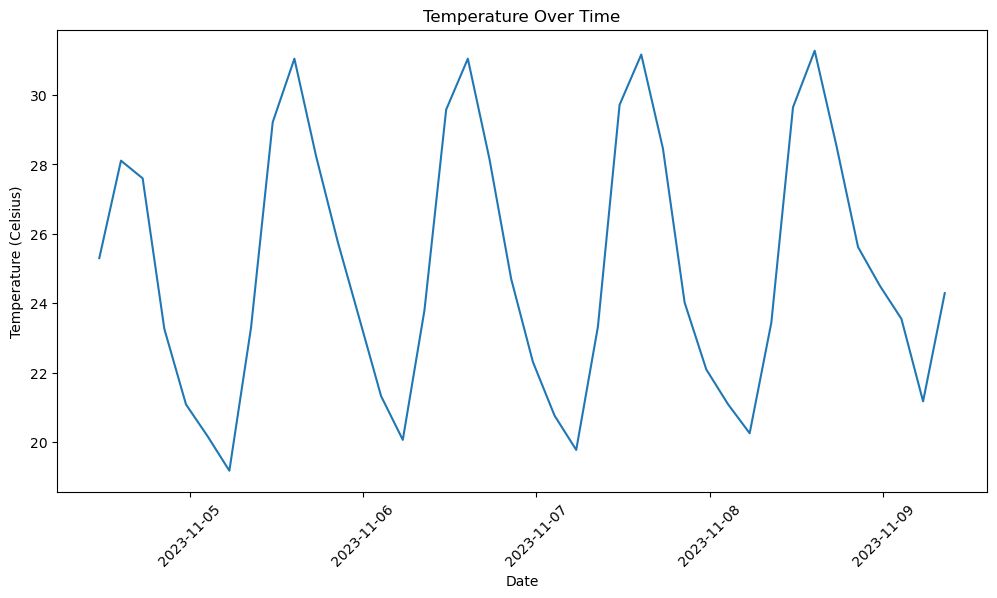

In [22]:
# Step 6: Visualize the data
def visualize_weather_data(weather_data):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Temperature (Celsius)', data=weather_data)
    plt.title('Temperature Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (Celsius)')
    plt.xticks(rotation=45)
    plt.show()

visualize_weather_data(weather_data)

In [23]:
# Step 7: Data aggregation
def aggregate_weather_data(weather_data, frequency='D'):
    aggregated_data = weather_data.set_index('Date').resample(frequency).mean()
    return aggregated_data


aggregate_weather_data(weather_data, frequency='D')


,Temperature (Celsius),Humidity (%),Wind Speed (m/s),Precipitation (mm)
Date,,,,
2023-11-04,25.070000,36.800000,2.578000,0.0
2023-11-05,25.057500,40.500000,3.026250,0.0
2023-11-06,25.121250,40.000000,2.607500,0.0
2023-11-07,24.913750,43.875000,2.355000,0.0
2023-11-08,25.548750,44.625000,2.331250,0.0
2023-11-09,23.003333,48.666667,2.206667,0.0


In [25]:
! conda install -c conda-forge folium=0.5.0 --yes
import folium
print("folium importd")

^C


ModuleNotFoundError: No module named 'folium'

In [26]:
pip install folium
print("impoted")

SyntaxError: invalid syntax (451797569.py, line 1)

In [24]:
# Step 8: Geospatial visualization (if latitude and longitude are available)


# Replace these with the actual latitude and longitude of your location
latitude = 20.012822  # Replace with the latitude of your location
longitude = 73.821142  # Replace with the longitude of your location

# Create a map centered at the specified latitude and longitude
map_location = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add a marker to the map
folium.Marker([latitude, longitude], tooltip='Your Location').add_to(map_location)

# Display the map
map_location.save('weather_map.html')  # Save the map to an HTML file

    # Continue with further analysis and visualizations as needed.

SyntaxError: invalid syntax (2266783122.py, line 3)

In [8]:


# Step 9: Relationship exploration and visualization

if __name__ == "__main__":
    city_name = 'Nashik'  # Replace with your desired city
    data = fetch_weather_data(city_name, api_key)
    weather_data = extract_weather_attributes(data)
    weather_data = clean_data(weather_data)
#     analyze_weather_patterns(weather_data)
#     visualize_weather_data(weather_data)
#     daily_aggregated_data = aggregate_weather_data(weather_data, 'D')
#     monthly_aggregated_data = aggregate_weather_data(weather_data, 'M')




Exception: Error fetching data: 401

SyntaxError: invalid syntax (2048857063.py, line 1)

In [2]:
# pip install folium


     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ------------------------------- ------- 81.9/102.3 kB 2.2 MB/s eta 0:00:01
     ----------------------------------- --- 92.2/102.3 kB 1.7 MB/s eta 0:00:01
     ------------------------------------ 102.3/102.3 kB 836.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
